In [ ]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'experiments-master-w-random.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,User,Threshold,Accuracy,Algo
0,U_1,0.05,0.324675,ActorCritic
1,U_1,0.10,0.684932,ActorCritic
2,U_1,0.20,0.492308,ActorCritic
3,U_1,0.30,0.701754,ActorCritic
4,U_1,0.40,0.693878,ActorCritic


In [ ]:
# Calculate the average accuracy for each algorithm at each threshold
average_accuracies = data.groupby(['Algo', 'Threshold']).Accuracy.mean().unstack()

# Display the calculated averages
average_accuracies
# print(average_accuracies)

Threshold,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90
Algo,,,,,,,,,,
ActorCritic,0.479072,0.591834,0.618621,0.697642,0.718436,0.729820,0.695964,0.715941,0.711191,0.773301
Greedy,0.590561,0.436494,0.549856,0.605112,0.631686,0.627001,0.624167,0.585441,0.707508,0.710837
Momentum,0.561264,0.574646,0.545442,0.561055,0.547222,0.579658,0.560870,0.549207,0.609072,0.526375
Naive,0.432822,0.387452,0.460942,0.449327,0.474802,0.455034,0.460189,0.419519,0.363584,0.412080
QLearn,0.418062,0.499890,0.527550,0.553029,0.622245,0.619894,0.620647,0.619484,0.685761,0.745716
Random,0.419253,0.400579,0.397472,0.435224,0.421634,0.398828,0.415895,0.437421,0.447572,0.501124
Reinforce,0.504023,0.625003,0.681110,0.664334,0.734221,0.684441,0.705125,0.699898,0.752034,0.809882
SARSA,0.416102,0.511744,0.559725,0.592361,0.612657,0.615401,0.620186,0.617188,0.687426,0.740977
WSLS,0.411783,0.408644,0.393600,0.408492,0.413122,0.438335,0.438651,0.421352,0.424204,0.448080


'forecache_accuracy.svg'

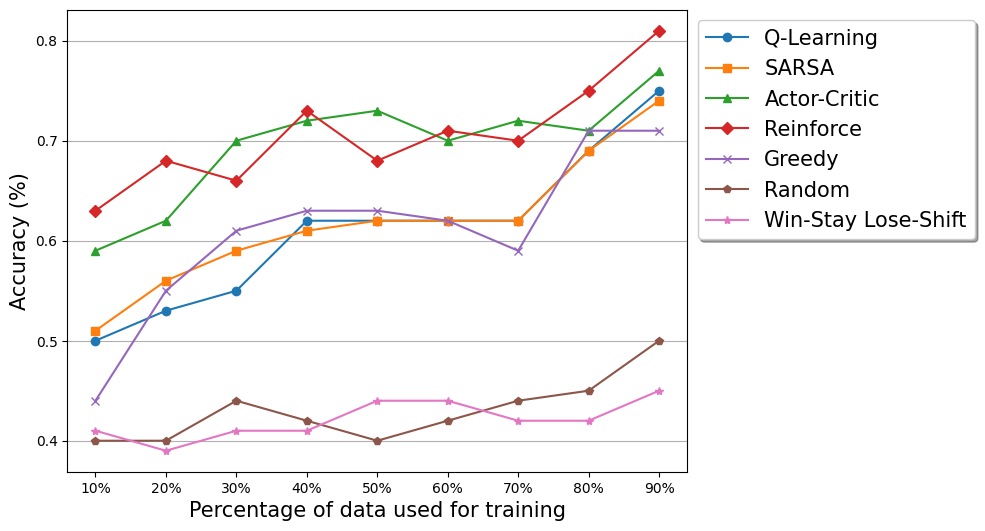

In [ ]:
import matplotlib.pyplot as plt

strategies = [
    'Q-Learning',
    'SARSA',
    'Actor-Critic',
    'Reinforce',
    'Greedy',
    'Random',
    'Win-Stay Lose-Shift',
    # 'Naive',
    # 'Momentum',
]

values = [
    [0.50, 0.53, 0.55, 0.62, 0.62, 0.62, 0.62, 0.69, 0.75],  # Q-Learning
    [0.51, 0.56, 0.59, 0.61, 0.62, 0.62, 0.62, 0.69, 0.74],  # SARSA
    [0.59, 0.62, 0.70, 0.72, 0.73, 0.70, 0.72, 0.71, 0.77],  # Actor-Critic
    [0.63, 0.68, 0.66, 0.73, 0.68, 0.71, 0.70, 0.75, 0.81],  # Reinforce
    [0.44, 0.55, 0.61, 0.63, 0.63, 0.62, 0.59, 0.71, 0.71],  # Greedy
    [0.40, 0.40, 0.44, 0.42, 0.40, 0.42, 0.44, 0.45, 0.50],  # Random
    [0.41, 0.39, 0.41, 0.41, 0.44, 0.44, 0.42, 0.42, 0.45],  # Win-Stay Lose-Shift
    # [0.39, 0.46, 0.45, 0.47, 0.46, 0.46, 0.42, 0.36, 0.41],  # Naive
    # [0.57, 0.55, 0.56, 0.55, 0.58, 0.56, 0.55, 0.61, 0.53],  # Momentum
]

# X-axis percentages and labels
x_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
markers = ['o', 's', '^', 'D', 'x', 'p', '*', '+']

# Plotting the new data with Y-axis limit up to 0.70
plt.figure(figsize=(8, 6))

for i, strategy in enumerate(strategies):
    plt.plot(values[i], marker=markers[i % len(markers)], label=strategy)

plt.xlabel('Percentage of data used for training', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.xticks(range(len(x_labels)), x_labels)  # Set custom x-axis ticks and labels
# plt.yticks([i * 0.1 for i in range(8)])  # Setting Y-axis ticks up to 0.70
# plt.ylim(0.0, 0.80)  # Setting Y-axis limit up to 0.70
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1, fontsize=15)
plt.grid(axis='y')
# plt.show()

# Save the plot as an SVG file
svg_file_path = 'forecache_accuracy.svg'
plt.savefig(svg_file_path, format='svg', bbox_inches='tight')

svg_file_path